# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [31]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

""" 
    Here we are using the open price.the slicing indicates that 
    select all rows but only the 2nd(index position is 1) column
"""


' Here we are using the open price.the slicing indicates that \n    select all rows but only the 2nd(index position is 1) column\n'

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [39]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) 
    y_train.append(training_set_scaled[i, 0])
    """
        Here, we are taking the train values in such a way that, for every previous 60 days of price, we are predicting the current price.
        so, the model will be trained in such a way that it remembers and uses the past 60 days of data to predict the current price.
    """

X_train, y_train = np.array(X_train), np.array(y_train) #Coverting them to numpy arrays

### Reshaping

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

"""
    As we did the array in such a way that, 60 days data for predicted single output,
    The array is of shape 1198(1258-60) rows and 60 columns. since two dimensional arrays of
    data cannot be given as input to the model, we will reshape the array.

    The reshaped array has the 1098 slices, each slice containig 60 rows and 1 column.

"""

In [53]:
X_train.shape[1]

60

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [41]:
regressor = Sequential() 

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM())

In [58]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
"""
    untis = 50 , High number of units(neurons) will be able to predict better
    return_sequences = True , This is used to return the values to the next LSTM layer
    input_shape = (X_train.shape[1], 1)) , To pass it as a 2D array

"""
regressor.add(Dropout(0.2))

"""
    Adding some dropout layers to avoid overfitting. 0.2 means 20%( 10 neurons in 50) of random neurons will 
    be ignored during farword and backword propagation.

"""

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'\n    Adding some dropout layers to avoid overfitting\n'

### Adding a second LSTM layer and some Dropout regularisation

In [59]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [60]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [61]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [62]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [63]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [64]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.1231
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0085
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0067
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0064
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0056
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0060
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0062
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0068
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0048
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0047
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [65]:
# reading the dataset
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

# Taking alll rows and first column (open price) 
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [66]:
""" Since we trained the model in such a way that it needs previous 60 days of 
    data to predict the price, the test set is having only 21 days of data (january 2017)
    we will concatinate the training dataset and test dataset and then we will take the
    60 previous days(60 previous days data from 3rd jan, 2017) of data from the training 
    dataset and all the values in the test dataset.
"""
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

"""
    Now, we will Reshape the array to a single cloumn
"""
inputs = inputs.reshape(-1,1)

# scale the data
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

#reshaping the test array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

#inverse_tranform the array to get the real prices from the scaled data
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


### Visualising the results

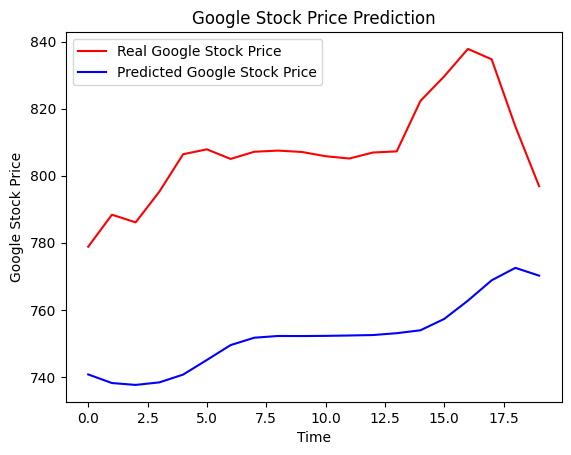

In [67]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

### Evaluating the results

In [69]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

56.57295602695575

### Improving the performance

In [ ]:
"""
    The performance can be improved by increasing the no of days of data to predict the one day price.
    instead of 60 days, we can take 120 days.
"""